# ( ADD EXPLANATION OF PROJECT AND VARIABLE NAMES ETC)

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [32]:
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly
import plotly.graph_objs as go
from plotly.plotly import iplot


In [3]:
train = pd.read_csv("train_values.csv")
y = pd.read_csv("train_labels.csv")

In [4]:
list(train.columns)

['patient_id',
 'slope_of_peak_exercise_st_segment',
 'thal',
 'resting_blood_pressure',
 'chest_pain_type',
 'num_major_vessels',
 'fasting_blood_sugar_gt_120_mg_per_dl',
 'resting_ekg_results',
 'serum_cholesterol_mg_per_dl',
 'oldpeak_eq_st_depression',
 'sex',
 'age',
 'max_heart_rate_achieved',
 'exercise_induced_angina']

Expect to see if there is a negative relationship between age and the maximum heart rate acheived. 

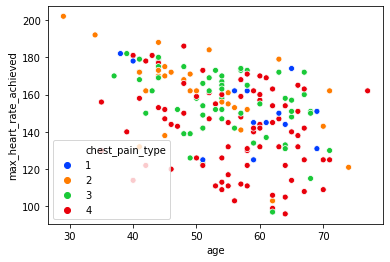

In [5]:
palette = sns.color_palette("bright", 4)
sns.scatterplot(x = 'age', y = 'max_heart_rate_achieved', 
                data = train, hue = train['chest_pain_type'], palette = palette)

As expected, there is a negative relationship between age and max heart rate acheived but they dont seem to correlate with chest pain type. Chest pain types seem to be relatively uniform. 

<Figure size 720x432 with 0 Axes>

chest_pain_type
1    57.846154
2    50.821429
3    54.315789
4    56.036585
Name: age, dtype: float64

Text(0.5, 1.0, 'Average Age of Chest Pain Type')

Text(0.5, 0, 'Chest Pain Type')

Text(0, 0.5, 'Age')

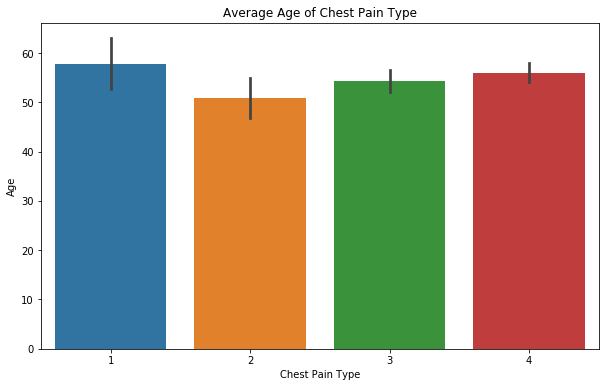

In [23]:
plt.figure(figsize = (10,6))
train.groupby('chest_pain_type')['age'].mean()
sns.barplot(x = train.chest_pain_type, y = train.age)
plt.title("Average Age of Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Age")


F_onewayResult(statistic=2.767207747398542, pvalue=0.04330865490718395)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    age   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     2.767
Date:                Tue, 20 Aug 2019   Prob (F-statistic):             0.0433
Time:                        00:13:53   Log-Likelihood:                -652.83
No. Observations:                 180   AIC:                             1314.
Df Residuals:                     176   BIC:                             1326.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  57.8462      2.551     22.672      0.000      52.811      62.882
C(chest_pain_type)[T.2]    -7.0247      3.087     -2.275      0.024     -13.118      -0.931
C(chest_pain_type)[T.3]    -3.5304      2.828     -1.249      0.213      -9.111       2.050
C(chest_pain_type)[T.4]    -1.8096      2.746     -0.659      0.511      -7.229       3.610
==============================================================================
Omnibus:                        1.571   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.456   Jarque-Bera (JB):                1.543
Skew:                          -0.141   Prob(JB):                        0.462
Kurtosis:                       2.645   Cond. No.                         8.88
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

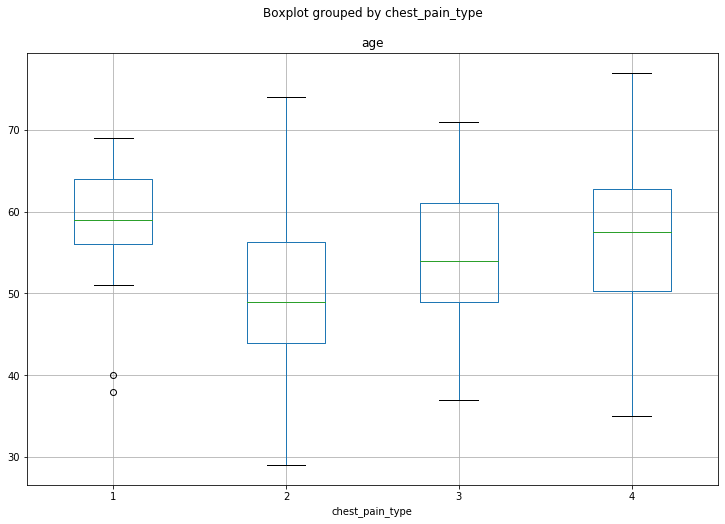

In [33]:
train.boxplot('age', by = 'chest_pain_type', figsize = (12,8))
stats.f_oneway(train['age'][train['chest_pain_type'] == 1],
                     train['age'][train['chest_pain_type'] == 2],
                     train['age'][train['chest_pain_type'] == 3],
                     train['age'][train['chest_pain_type'] == 4])

anova_test = smf.ols('age ~ C(chest_pain_type)', data = train).fit()
anova_test.summary()


A bar plot comparing the average ages per each chest pain type furthers my suspicions. There does not seem to be a significant difference in average ages between the types of chest pain. The boxplots and an Analysis of Variance test seem to suggest otherwise. The boxplot shows there is a difference in variance between the types of pain but their average is similar. The ANOVA test rejects the null hypothesis of there being no difference between groups with a p value of 0.0433, suggesting there is a difference in ages between the chest pains, but the model's effect size implies the difference is negligable. Thus confirming my suspicions. 

In [7]:
#cpt1 = train[train.chest_pain_type == 1]
#cpt2 = train[train.chest_pain_type == 2]
#cpt3 = train[train.chest_pain_type == 3]
#cpt4 = train[train.chest_pain_type == 4]

#trace1 = go.Scatter(
#                    x = cpt1.age, y = cpt1.max_heart_rate_achieved,
#                    mode = 'markers', name = 'Chest Pain Type 1', 
#                    marker = dict(color = 'rgba(255, 0, 0, 0.8)') )
    
#trace2 = go.Scatter(
#                    x = cpt2.age, y = cpt2.max_heart_rate_achieved,
#                    mode = 'markers', name = 'Chest Pain Type 2', 
#                    marker = dict(color = 'rgba(0, 200, 0, 0.8)') )
    
#trace3 = go.Scatter(
#                    x = cpt3.age, y = cpt3.max_heart_rate_achieved,
#                    mode = 'markers', name = 'Chest Pain Type 3', 
#                    marker = dict(color = 'rgba(0, 0, 255, 0.8)') )
    
#trace4 = go.Scatter(
#                    x = cpt4.age, y = cpt4.max_heart_rate_achieved,
#                    mode = 'markers', name = 'Chest Pain Type 4', 
#                    marker = dict(color = 'rgba(0, 0, 0, 0.8)') )
    
#data = [trace1, trace2, trace3, trace4]
    
#layout = dict(title = 'Age vs Max HR Achieved with Chest Pain Types',
#                 xaxis = dict(title = "Age", ticklen = 5, zeroline = False),
#                 yaxis = dict(title = "Max HR Achieved", ticklen = 5, zeroline = False))

#fig = dict(data = data, layout = layout)
#plotly.offline.plot(fig, filename = "Age_vs_MaxHR.html")

'Age_vs_MaxHR.html'